## DataSet Adult annual salary

Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.


Attribute Information:
 
Listing of attributes:

>50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [36]:
#Bibilotecas básicas 
import pandas as pd
import numpy as np

#Bibliotecas de DataViz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from bokeh.plotting import figure
from bokeh.io import show

#balaceamento de dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 

#tratamento de categóricas
from feature_engine import categorical_encoders as ce

#pre-processing
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#Modelagem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#estatística e métricas
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#otimização de modelos
from sklearn.model_selection import GridSearchCV

# PCA - DataCompression
from sklearn.decomposition import PCA

#Cluesterização
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN

#Pipeline
from sklearn.pipeline import make_pipeline

#esembles
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import lightgbm as lgb 
#import xgboost as xgb 

#biblioteca de explicação
#import shap

ImportError: cannot import name 'categorical_encoders' from 'feature_engine' (C:\Users\Helena.Lacaz\Anaconda3\envs\dh_base\lib\site-packages\feature_engine\__init__.py)

## ETL

In [2]:
columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain',\
            'capital_loss','hours_per_week','native_country','target']

x_treino =  pd.read_csv('adult.data', header = None, names = columns)
x_treino.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
x_teste =  pd.read_csv('adult.test', header=None, names=columns, skiprows=1)
x_teste.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [4]:
#vou usar o df concatenado, para não precisar fazer os tratamentos nos dois df e vou usar o split para criar os x_treino e x_teste

In [5]:
#conferiando quantidade de linhas e colunas dos dois df (treino e teste) para concatenar e conferir 
x_treino.shape

(32561, 15)

In [6]:
x_teste.shape

(16281, 15)

In [7]:
df=pd.concat([x_treino,x_teste])
df.shape

(48842, 15)

In [8]:
def normal(df, col, threshold=0.05):
    try:
        zscore, p_value = stats.normaltest(df[col])
        if p_value < threshold:
            result = 'not_normal'
        else:
            result = 'normal'
    except:
        zscore = p_value = np.nan
        result = 'not_applicable'
    return result

def outliers_count_IQR(df, col):
    try:
        if len(df[col].unique())>2: # if para eliminar features binárias
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr_range = q3 - q1
            lower = q1 - 1.5*iqr_range
            upper = q3 + 1.5*iqr_range
            out_low = df[df[col] < lower].count()[0]
            out_up = df[df[col] > upper].count()[0]
            outliers = out_low + out_up
            outliers_perc = round(outliers / df.shape[0],2)
        else:
            outliers = np.nan
            outliers_perc = np.nan
    except:
        outliers = np.nan
        outliers_perc = np.nan
    return outliers, outliers_perc


#o que interessa
def ETLtool_LucioEdu(df):
    df= df.rename(columns=str.lower)

    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    
    colunas = df.columns.tolist()
      
    eda_df['Amount_Unique'] = pd.Series(map(lambda x: len(df[x].unique().tolist()), colunas), index=colunas)

    eda_df['Min'] = df.min()
    eda_df['Max'] = df.max()
    eda_df['Mean'] = df.mean().round(3)
    eda_df['STD'] = df.std().round(3)
    
    eda_df['Normality'] = pd.Series(map(lambda x: normal(df, x), colunas), index=colunas)
    eda_df['Amount_Outliers'] = pd.Series(map(lambda x: outliers_count_IQR(df, x)[0], colunas), index=colunas)
    eda_df['%_Outliers'] = pd.Series(map(lambda x: outliers_count_IQR(df, x)[1], colunas), index=colunas)
    df = pd.DataFrame(eda_df)
    return df.loc[colunas,:]


def unique_values(df):

    for cols in df.columns:
        if (len(df[cols].unique()) < 5) and (df[cols].dtypes == 'object'):                
            print(cols, ' = ', list(df[cols].unique()))
    return  None

In [9]:
etl_df = ETLtool_LucioEdu(df)
etl_df

,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Min,Max,Mean,STD,Normality,Amount_Outliers,%_Outliers
age,0,0.0,int64,48842,74,17,90,38.644,13.711,not_applicable,216.0,0.00
workclass,0,0.0,object,48842,9,?,Without-pay,NaN,NaN,not_applicable,NaN,NaN
fnlwgt,0,0.0,int64,48842,28523,12285,1490400,189664.135,105604.025,not_applicable,1453.0,0.03
education,0,0.0,object,48842,16,10th,Some-college,NaN,NaN,not_applicable,NaN,NaN
education_num,0,0.0,int64,48842,16,1,16,10.078,2.571,not_applicable,1794.0,0.04
marital_status,0,0.0,object,48842,7,Divorced,Widowed,NaN,NaN,not_applicable,NaN,NaN
occupation,0,0.0,object,48842,15,?,Transport-moving,NaN,NaN,not_applicable,NaN,NaN
relationship,0,0.0,object,48842,6,Husband,Wife,NaN,NaN,not_applicable,NaN,NaN
race,0,0.0,object,48842,5,Amer-Indian-Eskimo,White,NaN,NaN,not_applicable,NaN,NaN
sex,0,0.0,object,48842,2,Female,Male,NaN,NaN,not_applicable,NaN,NaN


In [10]:
unique_values(df)

sex  =  [' Male', ' Female']
target  =  [' <=50K', ' >50K', ' <=50K.', ' >50K.']


In [11]:
df['target'] = df['target'].replace(' <=50K.', '<=50K')
df['target'] = df['target'].replace(' >50K.', '>50K')
df['target'] = df['target'].replace(' <=50K', '<=50K')
df['target'] = df['target'].replace(' >50K', '>50K')

<=50K    37155
>50K     11687
Name: target, dtype: int64


([<matplotlib.patches.Wedge at 0x1c7450abb50>,
 [Text(-0.8035625018699238, 0.7511905920527419, '<=50K'),
  Text(0.8035624667041533, -0.7511906296702167, '>50K')],
 [Text(-0.4383068192017766, 0.40974032293785917, '76.1%'),
  Text(0.4383068000204472, -0.40974034345648175, '23.9%')])

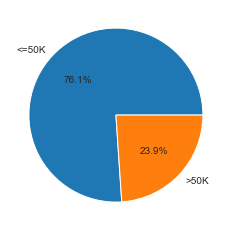

In [12]:
#balanceamento do target
print(df['target'].value_counts())

freq = df['target'].value_counts()
sns.set_style('white')
plt.figure()
plt.pie(freq.values, labels=freq.index, autopct='%1.1f%%' )

In [13]:
#primeiras percepções ações e sobre os dados

## Muitas colunas cateóricas com mtos valores únicos - pensar como fazer o tratamento 
### dummies pode ficar pesado
### labelencoder pode atribuir peso para certas características gerando viéses

## sem valores NaNs

##workclass - tem um dado com "?" - excluir linhas?

## pelo número de valores únicos a coluna fnlwgt não tem peso preditivo para o modelo - excluir

## education_num -- pode ser anos de estudos? não repete com education? 

## ocupation - tem um dado com "?" - excluir linhas?


## Ações

### ver quantos dados com ? em workclass - decidir se vamos excluir os dados
### ver quantos dados com ? em ocupation - decidir se vamos excluir os dados
### ver quantos dados com ? em native country - decidir se vamos excluir os dados
### Excluir fnlwgt
### observar correlação de education com edcucation_num
### trocar o target por binário

In [14]:
df.workclass.value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [15]:
df.occupation.value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [16]:
df.native_country.value_counts()

 United-States                 43832
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

In [17]:
# porcentagem pequena dos dados - vou excluir

In [18]:
df.drop(df[df['workclass'] == ' ?'].index , inplace=True)
df.drop(df[df['occupation'] == ' ?'].index , inplace=True)
df.drop(df[df['native_country'] == ' ?'].index , inplace=True)

In [19]:
del df['fnlwgt']

### EDA - Exploratory Data Analysis

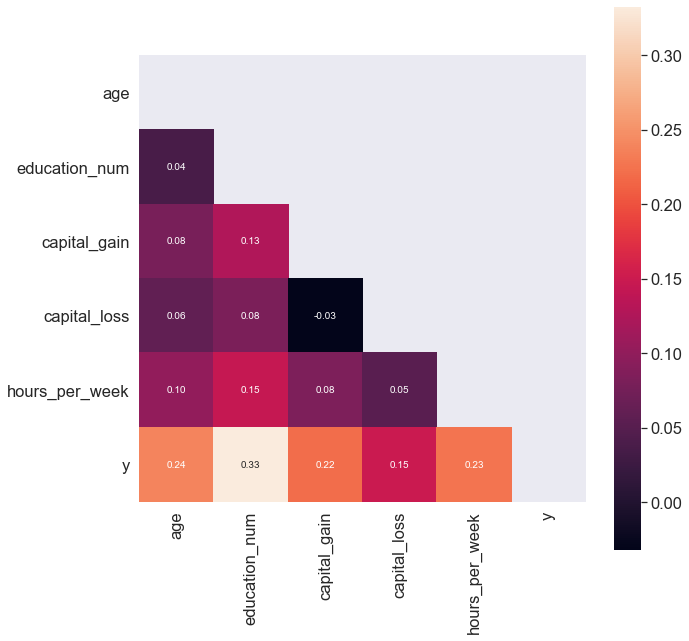

In [20]:
# Plotando um mapa de calor das correlações com todas as variáveis

# criando uma coluna booleana para a variável target
df['y'] = df['target'] == '>50K'

corrmat = df.corr()
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(np.ones_like(corrmat, dtype=bool))
hm = sns.heatmap(corrmat, 
                 mask = mask,
                 cbar=True, # formatando a barra lateral de cores para o heatmap
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=corrmat.columns, 
                 xticklabels=corrmat.columns)

In [21]:
df.corr().round(2)['y'].sort_values(ascending=False)

y                 1.00
education_num     0.33
age               0.24
hours_per_week    0.23
capital_gain      0.22
capital_loss      0.15
Name: y, dtype: float64

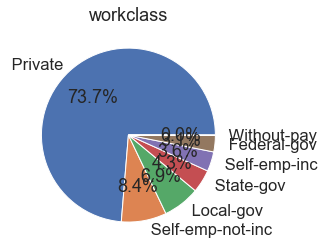

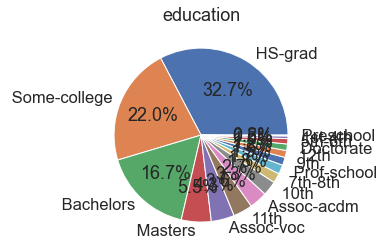

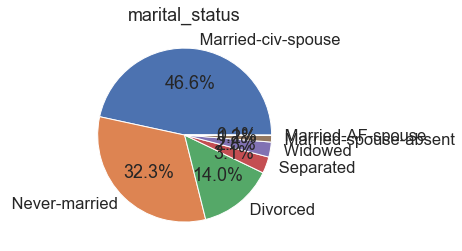

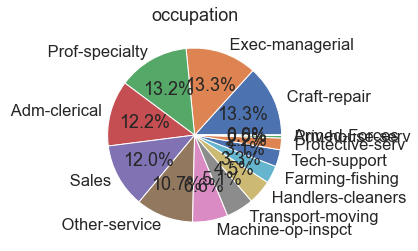

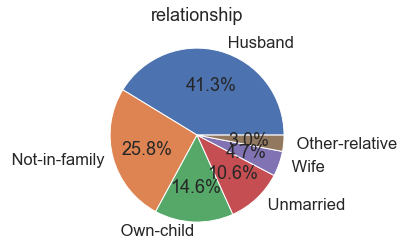

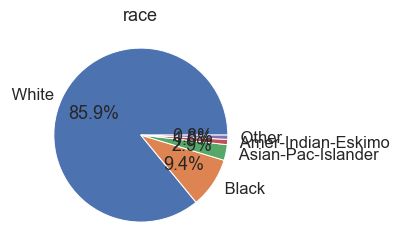

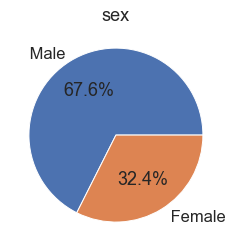

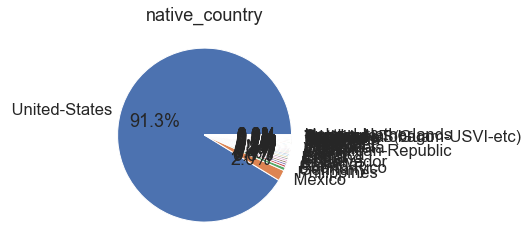

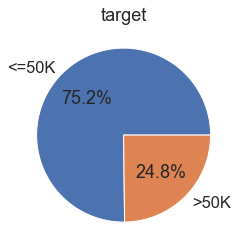

In [22]:
# Pie charts por feature: para features categóricas
for column in df.columns[0:]:
    if df[column].dtypes == 'object':
        freq = df[column].value_counts()
        sns.set_style('white')
        plt.figure()
        plt.pie(freq.values, labels=freq.index, autopct='%1.1f%%' )
        plt.title(column)

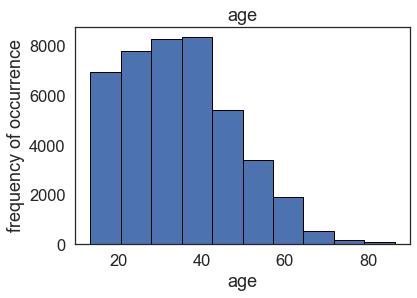

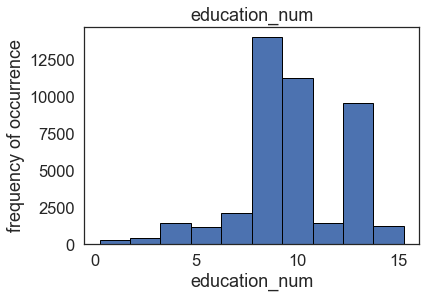

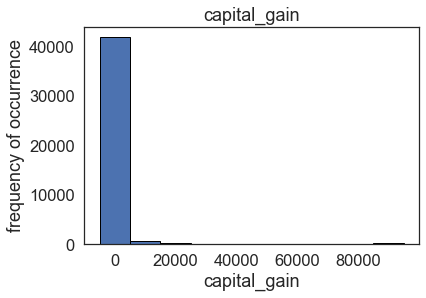

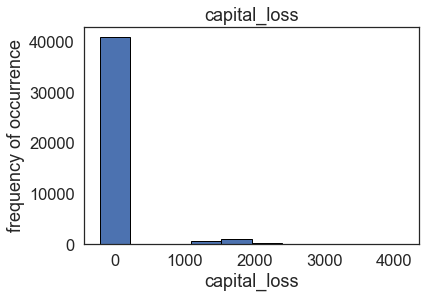

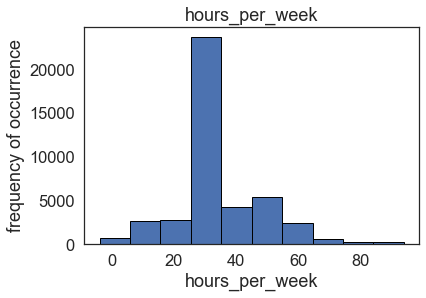

In [23]:
# Histogram por feature: features numéricas
for column in df.columns[0:]:
    if df[column].dtypes == 'int64':
        freq = len(df[column].value_counts())
        if freq >= 10:
            freq = 10
        df.hist(column=column,bins=freq,grid=False,edgecolor='black', align='left')
        plt.xlabel(column)
        plt.ylabel('frequency of occurrence')

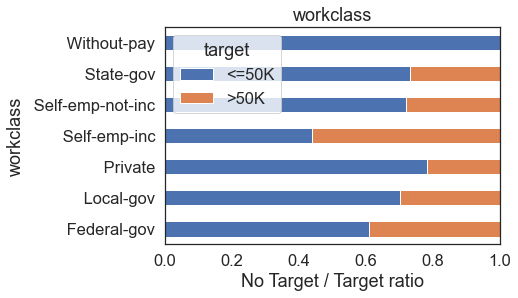

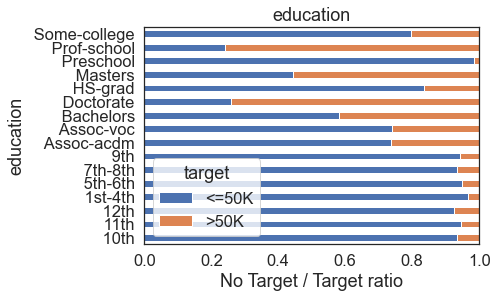

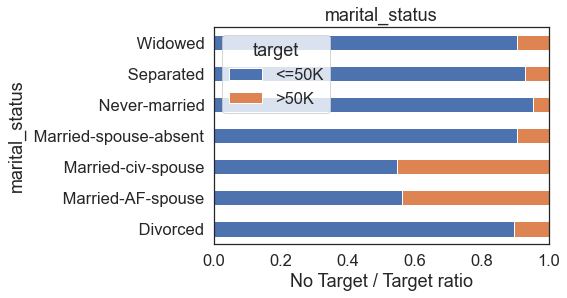

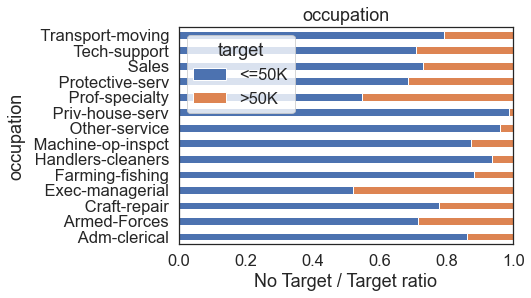

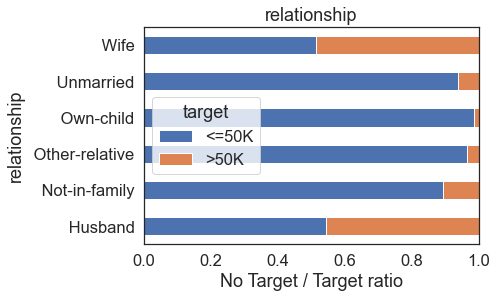

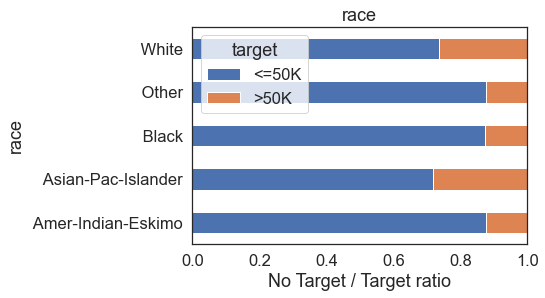

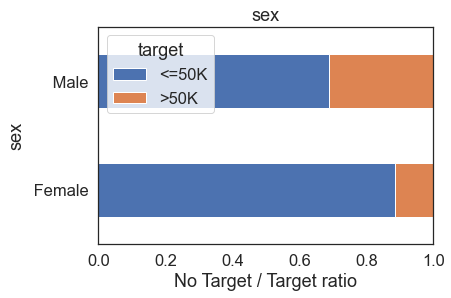

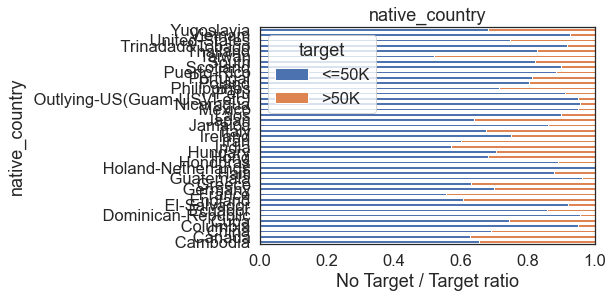

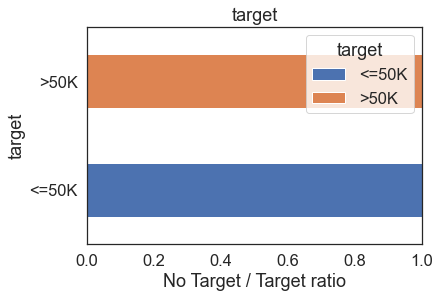

In [24]:
# Stacked plot para features categóricas
for column in df.columns[1:]:
    if df[column].dtypes == 'object':
        att_group = df.groupby([column,'target']).size().unstack()
        att_group.apply(lambda x:x/x.sum(),axis=1).plot(kind='barh', stacked=True)
        plt.xlabel('No Target / Target ratio')
        plt.xlim([0, 1])
        plt.title(column)

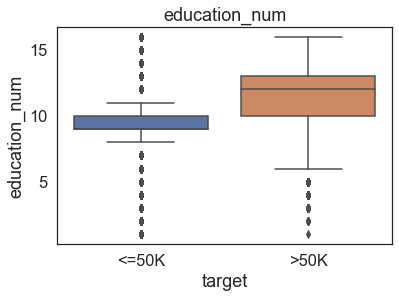

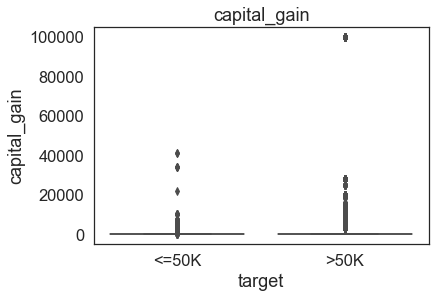

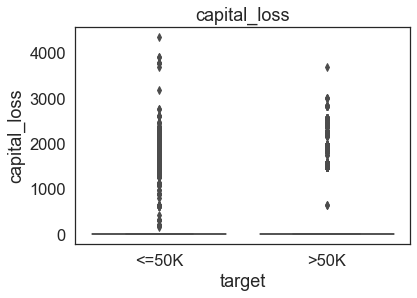

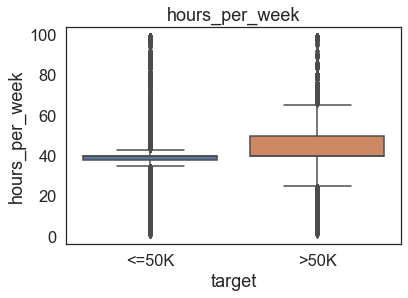

In [25]:
# Boxplot para features numéricas
for column in df.columns[1:]:
    if df[column].dtypes == 'int64':
        plt.figure()
        sns.boxplot(y=column, x='target', data= df, palette="deep")
        plt.title(column)

In [26]:
# Conclusões

In [27]:
#Hipóteses que levam uma pessoa a ganhar mais de 50K anual

## Criando um modelo de classificação

In [28]:
df['target'] = df['target'].replace('>50K', 1)
df['target'] = df['target'].replace('<=50K', 0)

#Valor 0 (Falso): Adulto não ganha acima de 50k anual
#Valor 1 (Verdadeiro): Adulto ganha acima de 50k anual

### Tratando Colunas Categóricas 

#### Dummies (até 5 valores únicos)

In [29]:
dummies_list = ['sex', 'race']

df = pd.get_dummies(df, columns = dummies_list)

#### Substituindo categóricas por valores numéricos (valores únicos igual ou acima de 6)

In [30]:
# refletir se é o ideal, pois essa ação atribui peso para os dados com números maiores 
# uma alternativa é usar a frequencyencoder

#for column in df.columns:
#    if df[column].dtype == 'object':
#        df[column] = LabelEncoder().fit_transform(df[column])
        
#df.head()

### Fazer o split dos dados

In [31]:
#separar o alvo
y = df['target']
del df['target']

x_treino, x_teste, y_treino, y_teste = train_test_split(df, y, test_size=0.25)

### Tratamentos das features categóricas acima de 5 valores únos utilizando encoder

In [35]:
## essa técnica trata as fetures categórica diminuindo o peso atrelado a elas

encoder = categorical_encoders.CountFrequencyCategoricalEncoder(encoding_method='frequency',
                         variables=['workclass','education','marital_status','occupation','relationship'])

NameError: name 'categorical_encoders' is not defined

In [ ]:
# como na teoria não sabemos quais são os dados de teste, não podemos usar o teste para dar o fit no encoder, apenas o x_treino e dps damos fit no teste

encoder.fit(x_treino)

x_treino = encoder.transform(x_treino)
x_teste = encoder.transform(x_teste)


### Balanceamento do dataset

In [ ]:
#testar fazer o balanceamento para ver se o modelo melhora

#print("Before OverSampling, counts of label '1': {}".format(sum(y_treino == 1)))
#print("Before OverSampling, counts of label '0': {} \n".format(sum(y_treino == 0)))

#sm = SMOTE() 
#x_treino_df, y_treino= sm.fit_sample(x_treino_df, y_treino.ravel()) 
  
#print("After OverSampling, counts of label '1': {}".format(sum(y_treino == 1)))
#print("After OverSampling, counts of label '0': {}".format(sum(y_treino == 0)))



#Udersampling - NearMiss

print("Antes do UnderSampling, número de dados '1': {}".format(sum(y_treino == 1)))
print("Antes do UnderSampling, número de dados '0': {} \n".format(sum(y_treino == 0)))

nr = NearMiss() 
x_treino, y_treino= nr.fit_sample(x_treino_df, y_treino.ravel()) 

print("Após do UnderSampling, número de dados '1': {}".format(sum(y_treino == 1)))
print("Após do UnderSampling, número de dados '0': {}".format(sum(y_treino == 0)))

### Pré-processamento

In [ ]:
#testando alguns scalers para normalizar os dados e diminuir a diferença de escala dos dados

#scaler = preprocessing.MinMaxScaler().fit(x_treino_df.values)
scaler = preprocessing.StandardScaler().fit(x_treino)

x_treino_norm = scaler.transform(x_treino)
x_teste_norm = scaler.transform(x_teste)

## Testando os modelos de classificação e imprimindo as métricas

In [ ]:
%%time

classifiers = [
    KNeighborsClassifier(),
    GaussianNB(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]

plt.figure(figsize=(12,8))

for clf in classifiers:
    # instanciando o modelo
    clf.fit(x_treino_norm, y_treino)
    # armazenando o nome do modelo na variável name
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    # imprimindo os resultados do modelo
    print('****Results****')
    y_pred_test = clf.predict(x_teste_norm)
    y_pred_train = clf.predict(x_treino_norm)
    print("Accuracy:", metrics.accuracy_score(y_teste, y_pred_test))
    print("Precision:", metrics.precision_score(y_teste, y_pred_test))
    print("Recall:", metrics.recall_score(y_teste, y_pred_test))
    
    # imprimindo as métricas para os dados de treino
    print('\n-----Dados de Treino-----')
    print('MSE - treino', mean_squared_error(y_treino, y_pred_train))
    print('MAE - treino', median_absolute_error(y_treino, y_pred_train))
    print('R2 - treino', r2_score(y_treino, y_pred_train))
    
    # imprimindo as métricas para os dados de teste
    print('\n-----Dados de Teste-----')
    print('MSE - test', mean_squared_error(y_teste, y_pred_test))
    print('MAE - test', median_absolute_error(y_teste, y_pred_test))
    print('R2 - test', r2_score(y_teste, y_pred_test))
    print('Matriz Confusão\n',metrics.confusion_matrix(y_teste, y_pred_test))
    
    # plotando a curva ROC
    y_pred_proba = clf.predict_proba(x_teste_norm)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_teste,  y_pred_proba)
    auc = metrics.roc_auc_score(y_teste, y_pred_proba)
    plt.plot(fpr,tpr,label=name+", auc="+str(auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.legend(loc=4)

### Feature Importance para o modelo

In [ ]:
reg = LogisticRegression().fit(x_treino_norm, y_treino)
reg.score(x_treino_norm, y_treino)

In [ ]:
x_treino_df = pd.DataFrame(x_treino, columns = df.columns.tolist())

importance_df = pd.DataFrame()
importance_df['colunas'] = x_treino_df.columns.tolist()
importance_df['importância'] = reg.coef_.tolist()[0]
importance_df.sort_values('importância',ascending=False).set_index('colunas')

In [ ]:
coef=np.round(reg.coef_,3).tolist()
coef = pd.DataFrame({'feature':x_treino_df.iloc[:, 0:x_treino_df.shape[1]].columns,'coefficient':coef[0]})
coef = coef.sort_values('coefficient',ascending=False).set_index('feature')


coef.plot.barh(figsize=(20, 10))
plt.show()